In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

# On obtient les coordonées géographiques de la région Auvergne Rhône-Alpes sur https://france-geojson.gregoiredavid.fr/

with open("data.json") as mon_fichier:
    data = json.load(mon_fichier)

contours = data["geometry"]["coordinates"]

44.115716677493 46.803872076205 2.0629079799591 7.1842712160815


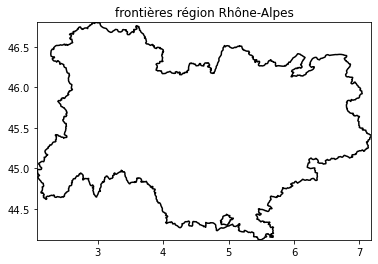

In [2]:
c1, c2 = contours
contour_region = np.array(c1)
contour_enclave = np.array(c2)

longitude_min = min(contour_region[:, 0])
longitude_max = max(contour_region[:, 0])
latitude_min = min(contour_region[:, 1])
latitude_max = max(contour_region[:, 1])

print(latitude_min, latitude_max, longitude_min, longitude_max)

plt.plot(contour_region[:, 0], contour_region[:, 1], c="black")
plt.plot(contour_enclave[:, 0], contour_enclave[:, 1], c="black")
plt.title("frontières région Rhône-Alpes")

plt.xlim([longitude_min, longitude_max])
plt.ylim([latitude_min, latitude_max])

plt.show()

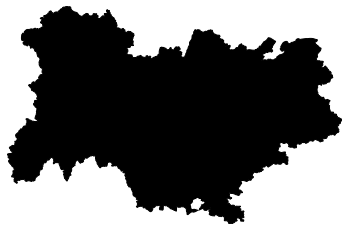

In [3]:
plt.fill(contour_region[:, 0], contour_region[:, 1], c="black")
plt.fill(contour_enclave[:, 0], contour_enclave[:, 1], c="white")

plt.xlim([longitude_min, longitude_max])
plt.ylim([latitude_min, latitude_max])

plt.axis("off")

plt.savefig("out.jpg", bbox_inches=None)

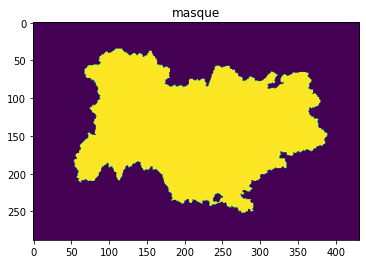

In [4]:
im = plt.imread("out.jpg")[:, :, 0]
im_mask = im < 127
plt.title("masque")
plt.imshow(im_mask)

In [5]:
print(im_mask.shape)

compt_ligne = 0


def test_ligne(a):
    only_false = True
    i = 0
    while only_false == True and i < len(a):
        if a[i] == True:
            only_false = False
        i += 1
    return only_false


for j in range(im_mask.shape[0]):
    if test_ligne(im_mask[j]):
        compt_ligne += 1

compt_ligne

(288, 432)


71

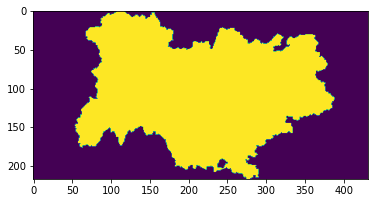

In [6]:
a = np.zeros((im_mask.shape[0] - compt_ligne, im_mask.shape[1]))

i = 0
j = 0
for i in range(im_mask.shape[0]):
    if not (test_ligne(im_mask[i])):
        a[j] = im_mask[i]
        j += 1

plt.imshow(a)

97
(217, 335)


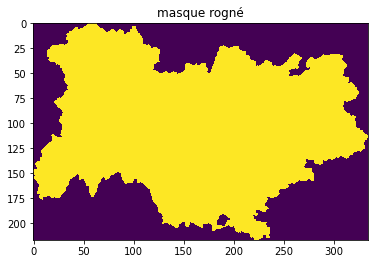

In [7]:
compt_colonne = 0

for j in range(im_mask.shape[1]):
    if test_ligne(im_mask[:, j]):
        compt_colonne += 1

print(compt_colonne)

im_crop = np.zeros((im_mask.shape[0] - compt_ligne, im_mask.shape[1] - compt_colonne))

i = 0
j = 0
for i in range(a.shape[1]):
    if not (test_ligne(a[:, i])):
        im_crop[:, j] = a[:, i]
        j += 1

plt.title("masque rogné")
plt.imshow(im_crop)
print(im_crop.shape)

In [8]:
nb_lignes = im_crop.shape[0]
nb_col = im_crop.shape[1]

scale = 2

# j'aimerais bien qu'on puisse augmenter/réduire le nombre de cases comme on veut mais c'est chaud

In [9]:
latitudes = np.linspace(
    latitude_min, latitude_max, nb_lignes
)  # ON DEVRAIT PRENDRE EN COMPTE L ANGLE MAIS EN PREMIERE APPROXIAMATION CA PASSE !
longitudes = np.linspace(longitude_min, longitude_max, nb_col)

coords = np.zeros((nb_lignes, nb_col, 2))

for i in range(nb_lignes):
    for j in range(nb_col):
        coords[i, j, 0] = longitudes[j]
        coords[i, j, 1] = latitudes[i]

coords

array([[[ 2.06290798, 44.11571668],
        [ 2.0782414 , 44.11571668],
        [ 2.09357483, 44.11571668],
        ...,
        [ 7.15360437, 44.11571668],
        [ 7.16893779, 44.11571668],
        [ 7.18427122, 44.11571668]],

       [[ 2.06290798, 44.12816184],
        [ 2.0782414 , 44.12816184],
        [ 2.09357483, 44.12816184],
        ...,
        [ 7.15360437, 44.12816184],
        [ 7.16893779, 44.12816184],
        [ 7.18427122, 44.12816184]],

       [[ 2.06290798, 44.14060701],
        [ 2.0782414 , 44.14060701],
        [ 2.09357483, 44.14060701],
        ...,
        [ 7.15360437, 44.14060701],
        [ 7.16893779, 44.14060701],
        [ 7.18427122, 44.14060701]],

       ...,

       [[ 2.06290798, 46.77898175],
        [ 2.0782414 , 46.77898175],
        [ 2.09357483, 46.77898175],
        ...,
        [ 7.15360437, 46.77898175],
        [ 7.16893779, 46.77898175],
        [ 7.18427122, 46.77898175]],

       [[ 2.06290798, 46.79142691],
        [ 2.0782414 , 46.79

In [10]:
new_im_crop = np.reshape(im_crop, (nb_lignes, nb_col, 1))
new_im_crop.shape

(217, 335, 1)

In [11]:
map_finale = np.concatenate((new_im_crop, coords), axis=2)

# Cette map finale est un tableau 2D de triples [0 si on est en dehors de la région ou 1 dedans, longitude, latitude]

map_finale

array([[[ 0.        ,  2.06290798, 44.11571668],
        [ 0.        ,  2.0782414 , 44.11571668],
        [ 0.        ,  2.09357483, 44.11571668],
        ...,
        [ 0.        ,  7.15360437, 44.11571668],
        [ 0.        ,  7.16893779, 44.11571668],
        [ 0.        ,  7.18427122, 44.11571668]],

       [[ 0.        ,  2.06290798, 44.12816184],
        [ 0.        ,  2.0782414 , 44.12816184],
        [ 0.        ,  2.09357483, 44.12816184],
        ...,
        [ 0.        ,  7.15360437, 44.12816184],
        [ 0.        ,  7.16893779, 44.12816184],
        [ 0.        ,  7.18427122, 44.12816184]],

       [[ 0.        ,  2.06290798, 44.14060701],
        [ 0.        ,  2.0782414 , 44.14060701],
        [ 0.        ,  2.09357483, 44.14060701],
        ...,
        [ 0.        ,  7.15360437, 44.14060701],
        [ 0.        ,  7.16893779, 44.14060701],
        [ 0.        ,  7.18427122, 44.14060701]],

       ...,

       [[ 0.        ,  2.06290798, 46.77898175],
        [ 0

In [12]:
print(map_finale.shape)
map_finale[100, 100, :]

(217, 335, 3)


array([ 1.        ,  3.59625027, 45.36023307])

Ce point est dans la région, longitude 3.596 et latitude 45.360